In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.metrics import r2_score
color_pal=sns.color_palette()

In [2]:
df=pd.read_csv('product c.csv', parse_dates=['Month-Year'], index_col='Month-Year')

In [3]:
sales_c= df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense'],axis=1)

In [4]:
sales_c

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,496334,1
2019-02-01,2019,306455,2
2019-03-01,2019,476270,3
2019-04-01,2019,628463,4
2019-05-01,2019,366750,5
2019-06-01,2019,352324,6
2019-07-01,2019,657300,7
2019-08-01,2019,429552,8
2019-09-01,2019,499906,9


<Axes: title={'center': 'Product C'}, xlabel='Month-Year'>

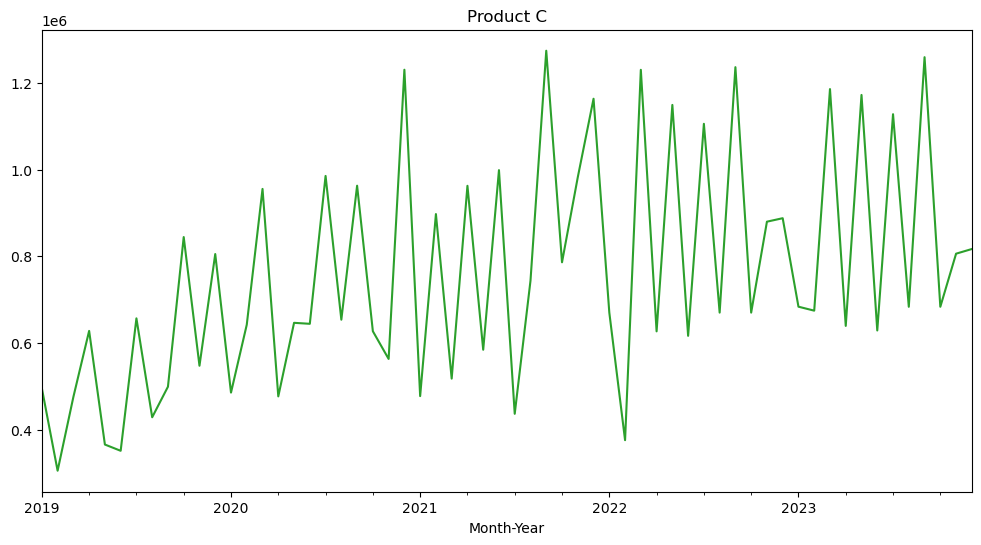

In [5]:
sales_c['Sales'].plot(figsize=(12,6),color=color_pal[2],title='Product C')

<Axes: ylabel='Frequency'>

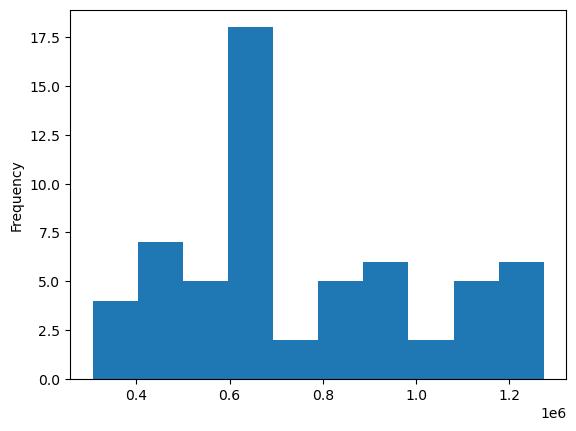

In [6]:
sales_c['Sales'].plot(kind='hist')

# Visualization

In [7]:
sales_c.head()

,Year,Sales,Month No.
Month-Year,,,
2019-01-01,2019,496334,1
2019-02-01,2019,306455,2
2019-03-01,2019,476270,3
2019-04-01,2019,628463,4
2019-05-01,2019,366750,5


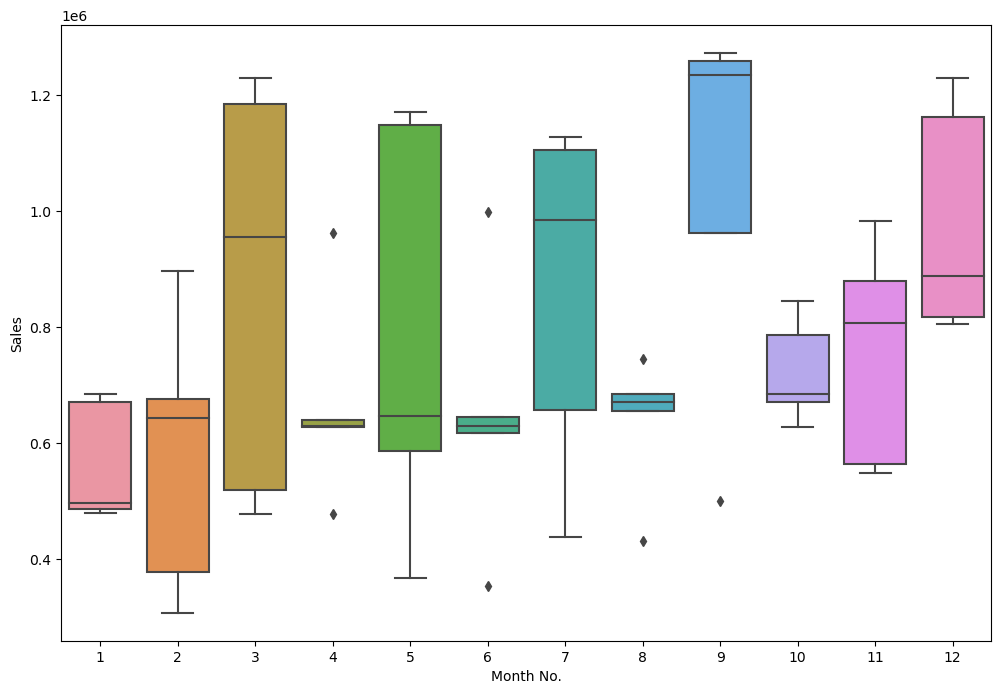

In [8]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_c, x='Month No.',y='Sales')
plt.show()

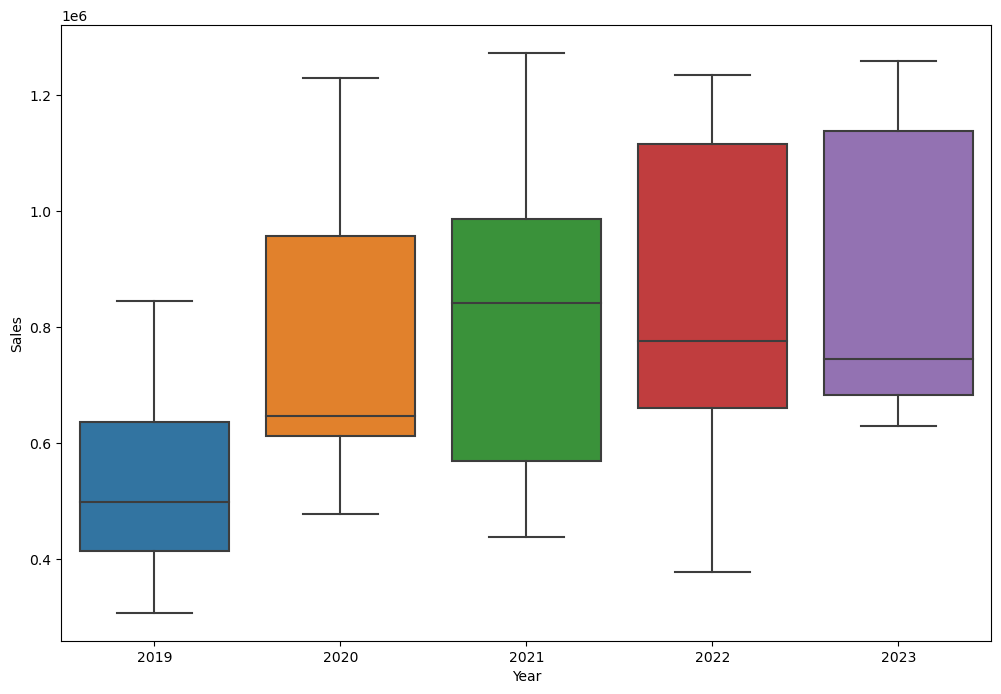

In [9]:
plt.figure(figsize=(12,8))
sns.boxplot(data=sales_c, x='Year',y='Sales')
plt.show()

# Feature Engineering

In [10]:
sales_c=df.drop(['Product Name','Product Category','Month','Market Size', 'Marketing Expense','Month No.','Year'],axis=1)

In [11]:
sales_c['quarter'] = sales_c.index.quarter
sales_c['month'] = sales_c.index.month
sales_c['year'] = sales_c.index.year

In [12]:
# Create lagged values
#lagged_intervals = [1, 3, 6, 12]  # Lagged intervals in months
#for lag in lagged_intervals:
#    sales_c[f'sales_lag_{lag}'] = sales_c['Sales'].shift(lag)

In [13]:
print(sales_c)

              Sales  quarter  month  year
Month-Year                               
2019-01-01   496334        1      1  2019
2019-02-01   306455        1      2  2019
2019-03-01   476270        1      3  2019
2019-04-01   628463        2      4  2019
2019-05-01   366750        2      5  2019
2019-06-01   352324        2      6  2019
2019-07-01   657300        3      7  2019
2019-08-01   429552        3      8  2019
2019-09-01   499906        3      9  2019
2019-10-01   844520        4     10  2019
2019-11-01   548192        4     11  2019
2019-12-01   805391        4     12  2019
2020-01-01   486322        1      1  2020
2020-02-01   642661        1      2  2020
2020-03-01   955368        1      3  2020
2020-04-01   477644        2      4  2020
2020-05-01   647027        2      5  2020
2020-06-01   644756        2      6  2020
2020-07-01   985263        3      7  2020
2020-08-01   654235        3      8  2020
2020-09-01   962755        3      9  2020
2020-10-01   627632        4     1

# Train/Test Split

In [14]:
train= sales_c[:48]
test=sales_c[48:]

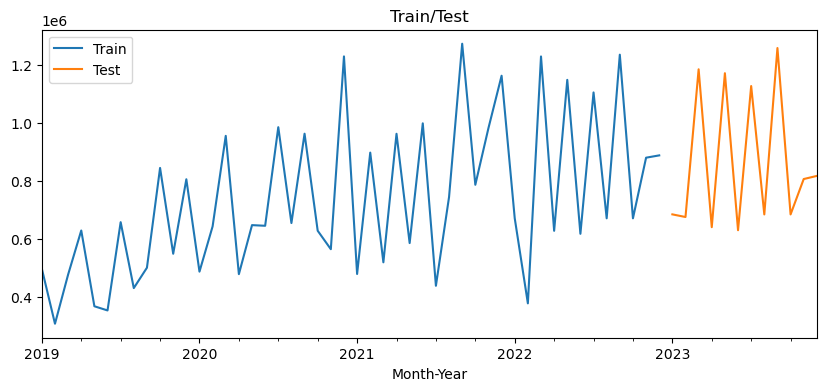

In [15]:
fig,ax=plt.subplots(figsize=(10,4))
train['Sales'].plot(ax=ax,label='Train set',title='Train/Test')
test['Sales'].plot(ax=ax,label='Test set')
plt.legend(['Train','Test'])
plt.show()

In [16]:
train.head()

,Sales,quarter,month,year
Month-Year,,,,
2019-01-01,496334,1,1,2019
2019-02-01,306455,1,2,2019
2019-03-01,476270,1,3,2019
2019-04-01,628463,2,4,2019
2019-05-01,366750,2,5,2019


In [17]:
x_train = train.drop(columns=['Sales'])
y_train=train['Sales']
x_test=test.drop(columns=['Sales'])
y_test=test['Sales']

In [19]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.001,0.01, 0.1, 0.2],
    'n_estimators': [100, 500, 1000, 2000],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'subsample': [0.7, 0.8, 0.9, 1.0]
}

# Instantiate the XGBoost regressor
regressor = xgb.XGBRegressor(objective='reg:squarederror')

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, 
                           cv=5, scoring='neg_mean_squared_error', 
                           verbose=2, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)

# Access the best parameters
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best parameters:", best_params)
print("Best estimator:", best_estimator)


Fitting 5 folds for each of 768 candidates, totalling 3840 fits
Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.001, 'max_depth': 3, 'n_estimators': 2000, 'subsample': 0.7}
Best estimator: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [18]:
reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=1.0,
                       subsample= 0.7,
                       early_stopping_rounds=50,
                       learning_rate=0.001)

reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)

[0]	validation_0-rmse:779360.34129	validation_1-rmse:894431.32472
[100]	validation_0-rmse:715970.13521	validation_1-rmse:825372.61158
[200]	validation_0-rmse:658263.35411	validation_1-rmse:762269.15321
[300]	validation_0-rmse:606501.20598	validation_1-rmse:706076.91891
[400]	validation_0-rmse:559884.84782	validation_1-rmse:655364.90936
[500]	validation_0-rmse:517832.45045	validation_1-rmse:609058.72452
[600]	validation_0-rmse:480239.88007	validation_1-rmse:567496.18129
[700]	validation_0-rmse:446682.12405	validation_1-rmse:530391.96052
[800]	validation_0-rmse:416710.71206	validation_1-rmse:496621.16803
[900]	validation_0-rmse:389611.40408	validation_1-rmse:465740.78916
[1000]	validation_0-rmse:365821.43709	validation_1-rmse:438264.14051
[1100]	validation_0-rmse:344470.91860	validation_1-rmse:413446.06858
[1200]	validation_0-rmse:325419.88882	validation_1-rmse:390896.39977
[1300]	validation_0-rmse:308673.12085	validation_1-rmse:370378.62173
[1400]	validation_0-rmse:293320.10922	validati

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [19]:
reg.best_iteration

1999

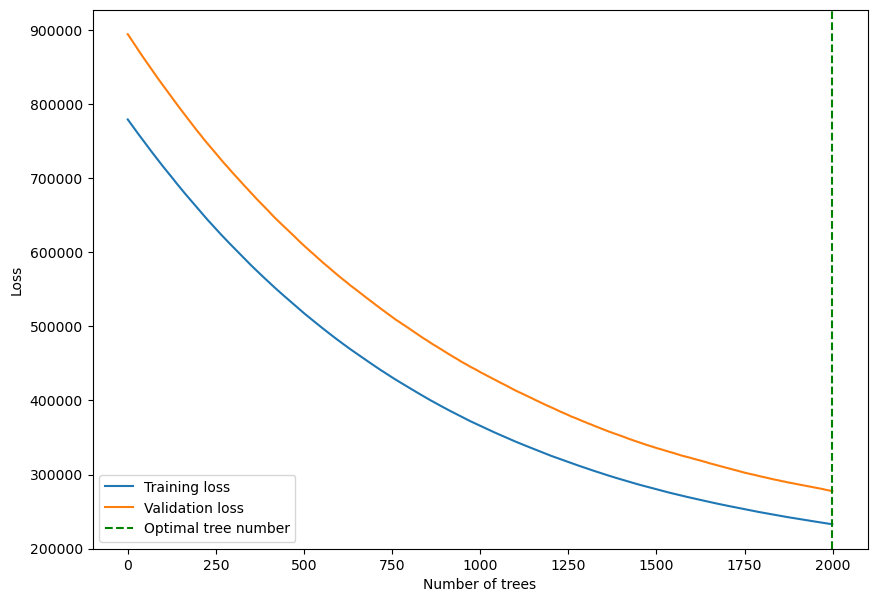

In [20]:
results = reg.evals_result()

plt.figure(figsize=(10,7))
plt.plot(results["validation_0"]["rmse"], label="Training loss")
plt.plot(results["validation_1"]["rmse"], label="Validation loss")
plt.axvline(1999,color='green',ls='--', label="Optimal tree number")
plt.xlabel("Number of trees")
plt.ylabel("Loss")
plt.legend()

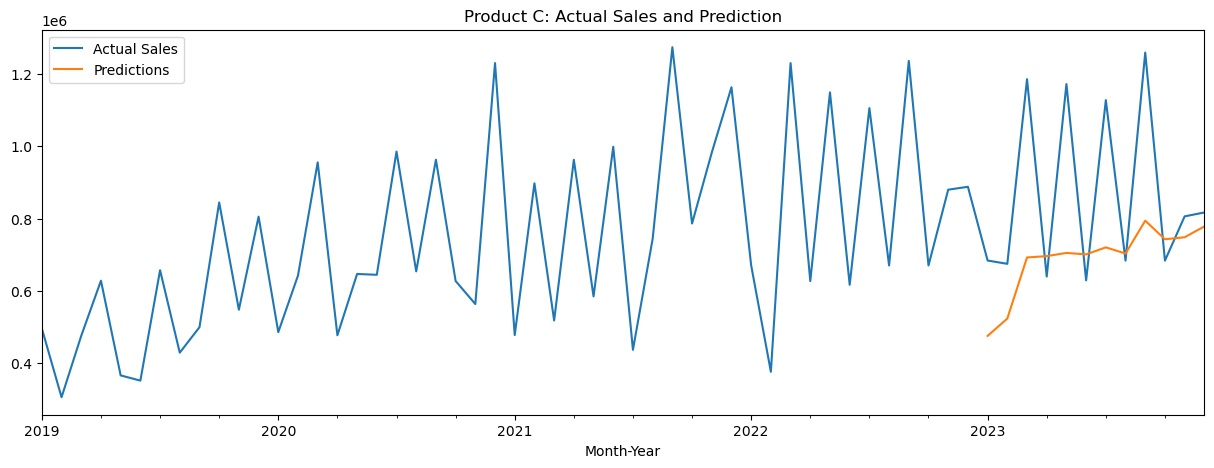

In [21]:
pred=reg.predict(x_test)
sales_c['prediction']=[None]*len(train) + list(pred)

ax = sales_c['Sales'].plot(figsize=(15, 5))
sales_c['prediction'].plot()
plt.legend(['Actual Sales', 'Predictions'])
ax.set_title('Product C: Actual Sales and Prediction')
plt.show()

In [22]:
mae_xgb= mean_absolute_error(test['Sales'],pred)
mse_xgb=mean_squared_error(test['Sales'], pred)
mape_xgb= mean_absolute_percentage_error(test['Sales'],pred)
rmse_xgb= np.sqrt(mean_squared_error(test['Sales'],pred))

print(f'MAE - XGBoost: {mae_xgb:0.3f}')
print(f'MAPE - XGBoost: {mape_xgb:0.3f}')
print(f'MSE - XGBoost: {mse_xgb:0.3f}')
print(f'RMSE - XGBoost: {rmse_xgb:0.3f}')

MAE - XGBoost: 207752.826
MAPE - XGBoost: 0.209
MSE - XGBoost: 77069695397.016
RMSE - XGBoost: 277614.292


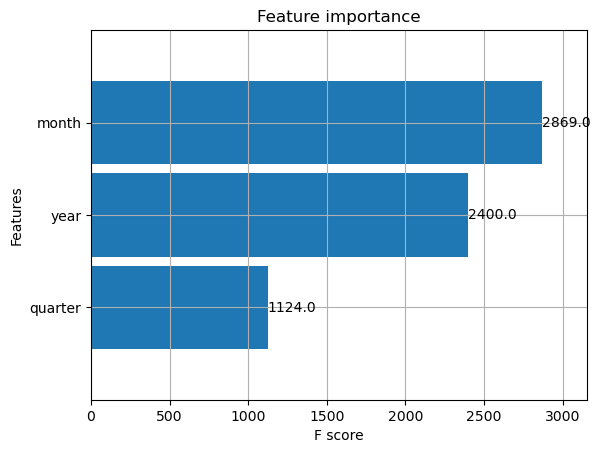

In [23]:
from xgboost import plot_importance

_ = plot_importance(reg, height=0.9)

# FORECASTING

In [24]:
x = sales_c.drop(columns=['Sales','prediction'])
y = sales_c['Sales']

In [25]:
reg_forecast= xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=2000,
                       objective='reg:squarederror',
                       max_depth=3,
                       colsample_bytree=1.0,
                       subsample= 0.7,
                       learning_rate=0.001)

reg_forecast.fit(x, y,
        eval_set=[(x, y)],
        verbose=100)

[0]	validation_0-rmse:803680.50588
[100]	validation_0-rmse:736826.30263
[200]	validation_0-rmse:676241.53400
[300]	validation_0-rmse:622014.06679
[400]	validation_0-rmse:573269.69417
[500]	validation_0-rmse:529493.79123
[600]	validation_0-rmse:490344.05303
[700]	validation_0-rmse:455342.38594
[800]	validation_0-rmse:424223.70645
[900]	validation_0-rmse:396180.11204
[1000]	validation_0-rmse:371332.98096
[1100]	validation_0-rmse:349316.64861
[1200]	validation_0-rmse:329807.58780
[1300]	validation_0-rmse:312516.94707
[1400]	validation_0-rmse:296623.17390
[1500]	validation_0-rmse:282667.30703
[1600]	validation_0-rmse:270499.70553
[1700]	validation_0-rmse:259540.81089
[1800]	validation_0-rmse:249791.25565
[1900]	validation_0-rmse:241007.28603
[1999]	validation_0-rmse:233019.16747


XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=2000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
future = pd.date_range(start='2024-01-01', end='2024-12-31', freq='MS')
future_df = pd.DataFrame(index=future)
future_df['isFuture'] = True
sales_c['isFuture'] = False
sales_c_and_future = pd.concat([sales_c, future_df])

In [27]:
sales_c_and_future['quarter'] = sales_c_and_future.index.quarter
sales_c_and_future['month'] = sales_c_and_future.index.month
sales_c_and_future['year'] = sales_c_and_future.index.year

In [28]:
sales_c_and_future=sales_c_and_future.drop(columns=['prediction'])

In [29]:
future_w_features = sales_c_and_future.query('isFuture').copy()
future_w_features=future_w_features.drop(columns=['Sales','isFuture'])

In [30]:
future_w_features

,quarter,month,year
2024-01-01,1,1,2024
2024-02-01,1,2,2024
2024-03-01,1,3,2024
2024-04-01,2,4,2024
2024-05-01,2,5,2024
2024-06-01,2,6,2024
2024-07-01,3,7,2024
2024-08-01,3,8,2024
2024-09-01,3,9,2024
2024-10-01,4,10,2024


In [31]:
future_w_features['pred'] = reg_forecast.predict(future_w_features)

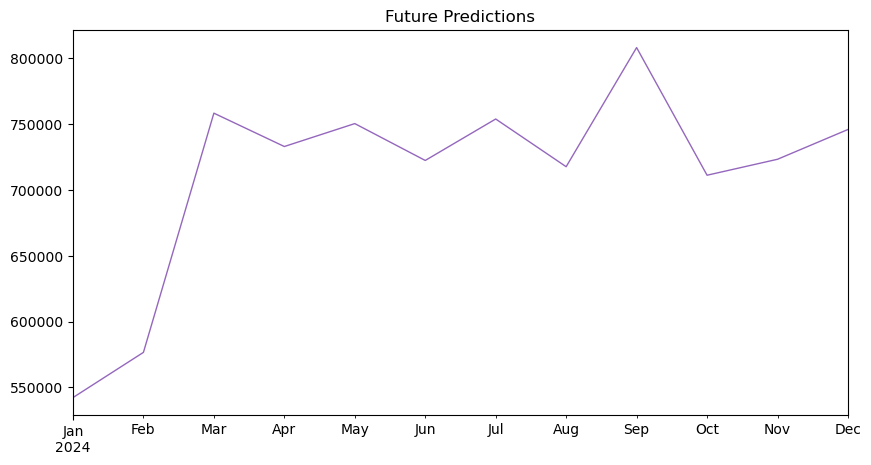

In [32]:
future_w_features['pred'].plot(figsize=(10, 5),
                               color=color_pal[4],
                               ms=1,
                               lw=1,
                               title='Future Predictions')
plt.show()

Text(0.5, 1.0, 'Product C')

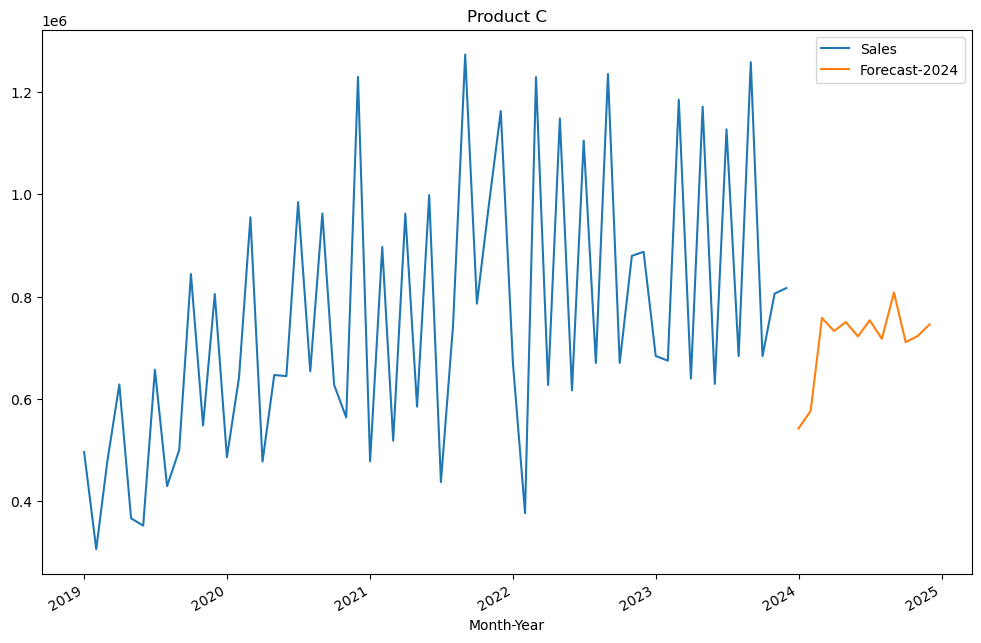

In [33]:
plt.figure(figsize=(12, 8))
sns.lineplot(sales_c[['Sales']])
future_w_features['pred'].plot(legend=True, label='Forecast-2024')
plt.title('Product C')